In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['2017.csv', '2016.csv', '2015.csv']


In [2]:
print("Reading 2015.csv file for analysis\n")

y_2015 = pd.read_csv("../input/2015.csv")

print("First 5 rows of data :\n",y_2015.head())

print("Last 5 rows of data :\n",y_2015.tail())


Reading 2015.csv file for analysis

First 5 rows of data :
        Country          Region        ...          Generosity  Dystopia Residual
0  Switzerland  Western Europe        ...             0.29678            2.51738
1      Iceland  Western Europe        ...             0.43630            2.70201
2      Denmark  Western Europe        ...             0.34139            2.49204
3       Norway  Western Europe        ...             0.34699            2.46531
4       Canada   North America        ...             0.45811            2.45176

[5 rows x 12 columns]
Last 5 rows of data :
      Country        ...        Dystopia Residual
153   Rwanda        ...                  0.67042
154    Benin        ...                  1.63328
155    Syria        ...                  0.32858
156  Burundi        ...                  1.83302
157     Togo        ...                  1.56726

[5 rows x 12 columns]


In [3]:
print("Data Info :\n")
print(y_2015.info())

Data Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None


In [41]:
print("Data Describe\n",(y_2015['Freedom'].describe()))

Data Describe
 count    158.000000
mean       0.428615
std        0.150693
min        0.000000
25%        0.328330
50%        0.435515
75%        0.549092
max        0.669730
Name: Freedom, dtype: float64


In [5]:
print("Check if any column has Null Value:\n")
print(y_2015.isnull().sum())


Check if any column has Null Value:

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [6]:
print("Count of unique values in each columns:\n")
print(y_2015.nunique())

Count of unique values in each columns:

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64


In [7]:
print("Unique Region names:\n")
for region in y_2015['Region'].unique():
    print(region)

Unique Region names:

Western Europe
North America
Australia and New Zealand
Middle East and Northern Africa
Latin America and Caribbean
Southeastern Asia
Central and Eastern Europe
Eastern Asia
Sub-Saharan Africa
Southern Asia


In [8]:
print("Count of each Regions:\n")
print(y_2015['Region'].value_counts())

Count of each Regions:

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


In [9]:
print("Unique Country names:\n")
for index,country in enumerate(y_2015['Country'].unique()):
    print(index+1,country)

Unique Country names:

1 Switzerland
2 Iceland
3 Denmark
4 Norway
5 Canada
6 Finland
7 Netherlands
8 Sweden
9 New Zealand
10 Australia
11 Israel
12 Costa Rica
13 Austria
14 Mexico
15 United States
16 Brazil
17 Luxembourg
18 Ireland
19 Belgium
20 United Arab Emirates
21 United Kingdom
22 Oman
23 Venezuela
24 Singapore
25 Panama
26 Germany
27 Chile
28 Qatar
29 France
30 Argentina
31 Czech Republic
32 Uruguay
33 Colombia
34 Thailand
35 Saudi Arabia
36 Spain
37 Malta
38 Taiwan
39 Kuwait
40 Suriname
41 Trinidad and Tobago
42 El Salvador
43 Guatemala
44 Uzbekistan
45 Slovakia
46 Japan
47 South Korea
48 Ecuador
49 Bahrain
50 Italy
51 Bolivia
52 Moldova
53 Paraguay
54 Kazakhstan
55 Slovenia
56 Lithuania
57 Nicaragua
58 Peru
59 Belarus
60 Poland
61 Malaysia
62 Croatia
63 Libya
64 Russia
65 Jamaica
66 North Cyprus
67 Cyprus
68 Algeria
69 Kosovo
70 Turkmenistan
71 Mauritius
72 Hong Kong
73 Estonia
74 Indonesia
75 Vietnam
76 Turkey
77 Kyrgyzstan
78 Nigeria
79 Bhutan
80 Azerbaijan
81 Pakistan
82 Jo

In [10]:
print ("Arranging the Countries according to their Regions:\n")
data = {}

for region,country in zip(y_2015['Region'],y_2015['Country']):
    if region not in data:
        data[region] = country
    else:
        data[region] += ',' + country

for keys,values in data.items():
    print(keys,":\n",values,'\n')

Arranging the Countries according to their Regions:

Western Europe :
 Switzerland,Iceland,Denmark,Norway,Finland,Netherlands,Sweden,Austria,Luxembourg,Ireland,Belgium,United Kingdom,Germany,France,Spain,Malta,Italy,North Cyprus,Cyprus,Portugal,Greece 

North America :
 Canada,United States 

Australia and New Zealand :
 New Zealand,Australia 

Middle East and Northern Africa :
 Israel,United Arab Emirates,Oman,Qatar,Saudi Arabia,Kuwait,Bahrain,Libya,Algeria,Turkey,Jordan,Morocco,Lebanon,Tunisia,Palestinian Territories,Iran,Iraq,Egypt,Yemen,Syria 

Latin America and Caribbean :
 Costa Rica,Mexico,Brazil,Venezuela,Panama,Chile,Argentina,Uruguay,Colombia,Suriname,Trinidad and Tobago,El Salvador,Guatemala,Ecuador,Bolivia,Paraguay,Nicaragua,Peru,Jamaica,Dominican Republic,Honduras,Haiti 

Southeastern Asia :
 Singapore,Thailand,Malaysia,Indonesia,Vietnam,Philippines,Laos,Myanmar,Cambodia 

Central and Eastern Europe :
 Czech Republic,Uzbekistan,Slovakia,Moldova,Kazakhstan,Slovenia,Lithuani

In [11]:
print("Data types of all the columns:")
print(y_2015.dtypes)

Data types of all the columns:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


**Data Visualization**

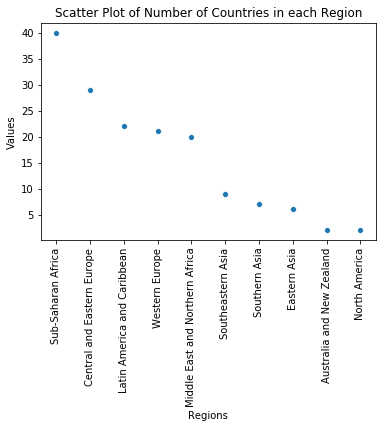

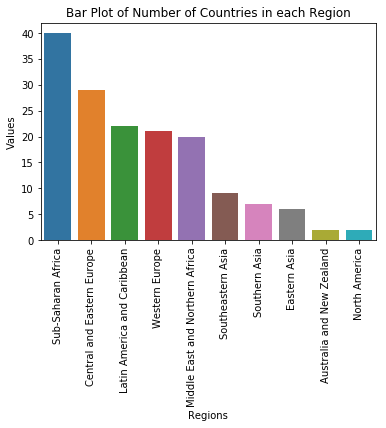

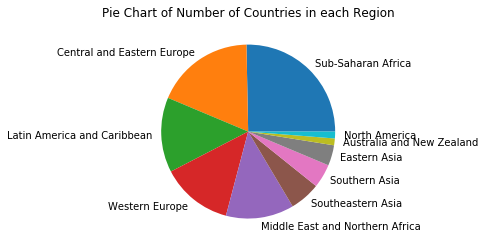

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
region = y_2015['Region'].value_counts()

sns.scatterplot(region.index,region.values)
plt.title("Scatter Plot of Number of Countries in each Region")
plt.xticks(rotation=90)
plt.xlabel("Regions")
plt.ylabel("Values")
plt.show()

sns.barplot(region.index,region.values)
plt.title("Bar Plot of Number of Countries in each Region")
plt.xticks(rotation=90)
plt.xlabel("Regions")
plt.ylabel("Values")
plt.show()

plt.pie(region.values,labels = region.index)
plt.title("Pie Chart of Number of Countries in each Region")

plt.show()

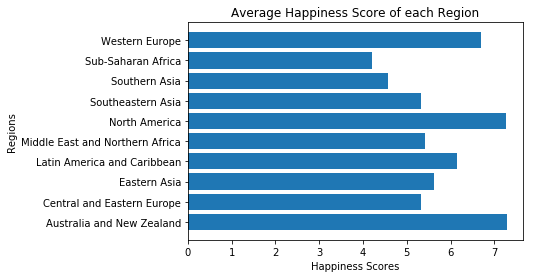

In [13]:
#Regions that are more happier than the rest
data = y_2015.groupby('Region')['Happiness Score'].mean()

plt.barh(data.index,data.values)
plt.title("Average Happiness Score of each Region")
plt.xlabel("Happiness Scores")
plt.ylabel("Regions")
plt.show()

[40 29 22 21 20  9  7  6  2  2]


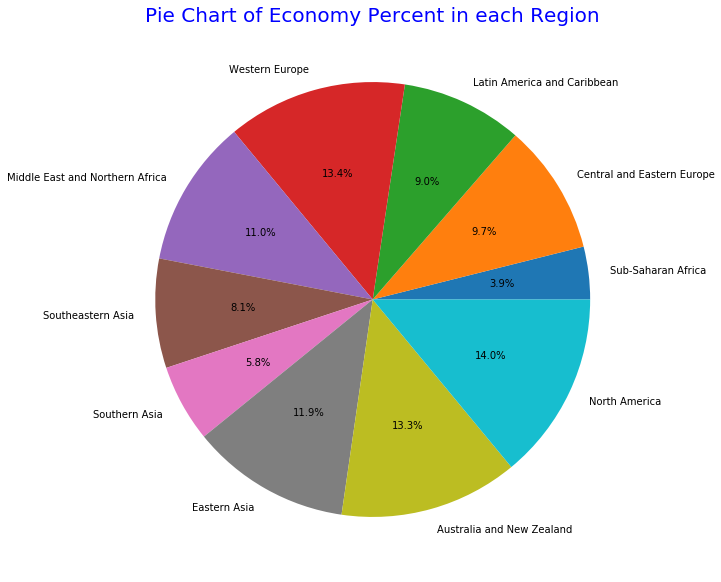

In [39]:
#pie chart of economy percent of all regions

region_names = y_2015['Region'].value_counts().index
region_values =  y_2015['Region'].value_counts().values

economy_rate = []
for i,reg in enumerate(region_names):    
    gdp = sum(y_2015[y_2015['Region']==reg]['Economy (GDP per Capita)'])/region_values[i]
    economy_rate.append(gdp)

plt.figure(figsize=(10,10))
plt.pie(economy_rate,labels = region_names,autopct='%1.1f%%')
plt.title("Pie Chart of Economy Percent in each Region",color='b',fontsize=20)

plt.show()

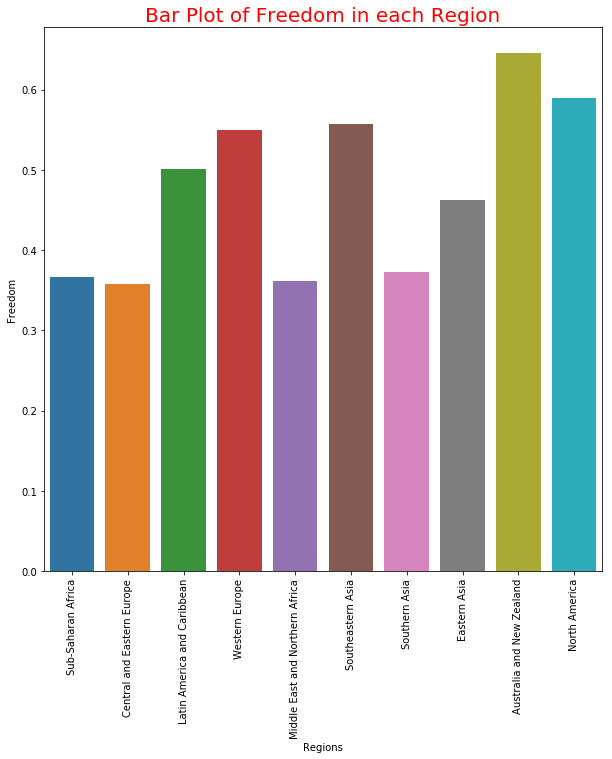

In [45]:
region_names = y_2015['Region'].value_counts().index
region_values =  y_2015['Region'].value_counts().values

freedom_rate = []
for i,reg in enumerate(region_names):
    freedom = sum(y_2015[y_2015['Region'] == reg]['Freedom'])/region_values[i]
    freedom_rate.append(freedom)
    
plt.figure(figsize=(10,10))
sns.barplot(region_names,freedom_rate)
plt.title("Bar Plot of Freedom in each Region",color='r',fontsize=20)
plt.xlabel("Regions")
plt.ylabel("Freedom")
plt.xticks(rotation=90)
plt.show()

#Regions Vs Economy
#Region Vs Freedom
#Region Vs Happiness Rank
#Region Vs Trust

#Freedom Vs Trust
#Freedom Vs Happiness Rank
#Freedom Vs Economy

#Happiness Rank and Happiness Score

[0.22113674999999997, 0.15226379310344823, 0.2177877272727273, 0.30210857142857145, 0.19037549999999995, 0.41926111111111114, 0.34142857142857147, 0.225885, 0.455315, 0.42958]


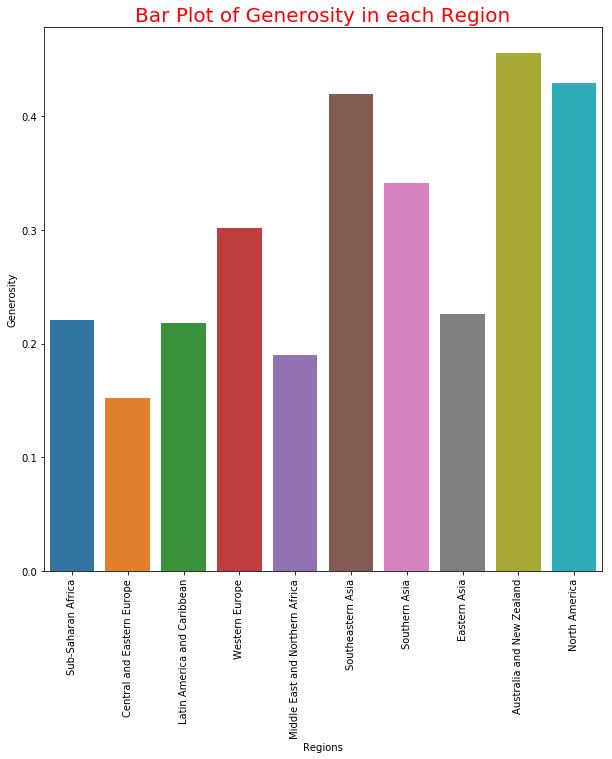

Least Generous Region:
 Central and Eastern Europe
Most Generous Region:
 Australia and New Zealand


In [56]:
#Most generous region
region_names = y_2015['Region'].value_counts().index
region_values = y_2015['Region'].value_counts().values

generosity = []

for i,reg in enumerate(region_names):
    generosity.append(sum(y_2015[y_2015['Region']==reg]['Generosity'])/region_values[i])
                
plt.figure(figsize=(10,10))
sns.barplot(region_names,generosity)
plt.title("Bar Plot of Generosity in each Region",color='r',fontsize=20)
plt.xlabel("Regions")
plt.ylabel("Generosity")
plt.xticks(rotation=90)
plt.show()

max_a = generosity[0]
min_a = generosity[0]

max_b = 0
min_b = 0

for i,g in enumerate(generosity):
    if min_a > generosity[i]:
        min_a = generosity[i]
        min_b = i
    elif max_a < generosity[i]:
        max_a = generosity[i]
        max_b = i
print("Least Generous Region:\n",region_names[min_b])
print("Most Generous Region:\n",region_names[max_b])
